<a href="https://colab.research.google.com/github/Sreeshbk/Computer_Vision/blob/main/introduction_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Utility Function
DOWNLOAD_IMG_WEB = True
RELATIVE_PATH = "."

def downloadImage(rel_path=RELATIVE_PATH):
  '''
  Download image if the files are not available in local. Add the path of web url if needed to download or else place all the images in the relative path
  Modify the code to add your own images and Image Map
  Parameter
  ----------------
  rel_path : path where the images are final saved or already placed

  Processing
  ----------------
  IMG_MAP - Key and mapping file name. Images are referenced by name in below code, incase program needs to be test for different image modify or add
            the new entry
  Output
  -------------------
  A Map with key and file path as value
  '''
  IMG_MAP={ "mandrill": "https://upload.wikimedia.org/wikipedia/commons/c/c0/Wikipedia-sipi-image-db-mandrill-4.2.03-quantize-only-CCC.png",
            "bookpage":"https://pythonprogramming.net/static/images/opencv/bookpage.jpg",
            "spoon" :"https://upload.wikimedia.org/wikipedia/commons/a/a0/Loeffel_03.JPG",
            "ballon" :"https://upload.wikimedia.org/wikipedia/commons/a/a0/Loeffel_03.JPG"
  }
  image_map ={}
  from os import path
  import urllib.request
  for key, image_url in IMG_MAP.items():
    image_map[key] =rel_path+"/"+key+path.splitext(image_url)[1]
    urllib.request.urlretrieve(image_url, image_map[key])
  return image_map

image_map= downloadImage()

# Image processing using OpenCV

Image processing loads the image into Numpy arrays. The imread function from cv2 library has to be used. 

Note: cv2 handles images in BGR (Blue, Green, Red) format by default, unlike the usual RGB format. 

In [61]:
import cv2 as cv
import numpy as np
image_name=image_map["mandrill"]
image_name

'./mandrill.png'

### Read Image

` image_ref= cv2.imread(abs_path_to_ip_file_as_string, ImreadModes) `

In [62]:
img_color = cv.imread(image_name,cv.IMREAD_COLOR) #default - IMREAD_COLOR or 1
img_unchanged = cv.imread(image_name,cv.IMREAD_UNCHANGED) # IMREAD_UNCHANGED or -1
img_grayscale = cv.imread(image_name,cv.IMREAD_GRAYSCALE) #IMREAD_COLOR or 0

### Display Image

> cv2.imshow(window_name_as_string,image_ref) <br>
> cv2.waitKey(time_to_wait_in_milliseconds) <br>
> cv2.destroyAllWindows() <br>

Note: imshow is disabled in collab. For Collab env use

> from google.colab.patches import cv2_imshow<br>
> cv2_imshow(cv2_imshow)<br>




In [63]:
def show_image(image,named_window="Image"):
  def display_image(f,parameter):
    f(*parameter)

  if 'google.colab'  in str(get_ipython()):
    from google.colab.patches import cv2_imshow
    if type(image) is tuple:
      image =image[1]
    display_image(cv2_imshow,(image,))
  else:
    display_image(cv.imshow,(named_window,image))
    cv.waitKey(500) #when no arg, waits till any key press 
    cv.destroyAllWindows() #closes all managed windows 



<class 'numpy.ndarray'>


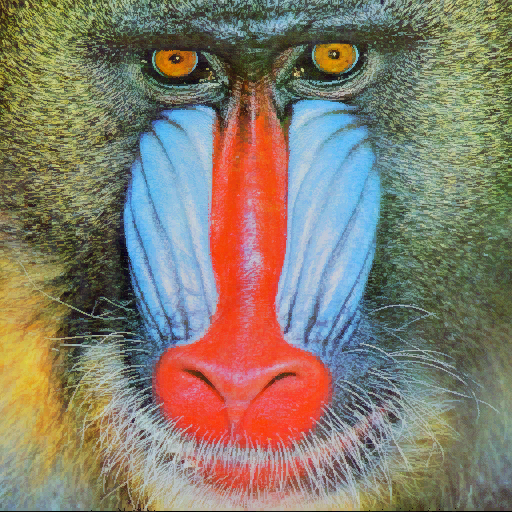

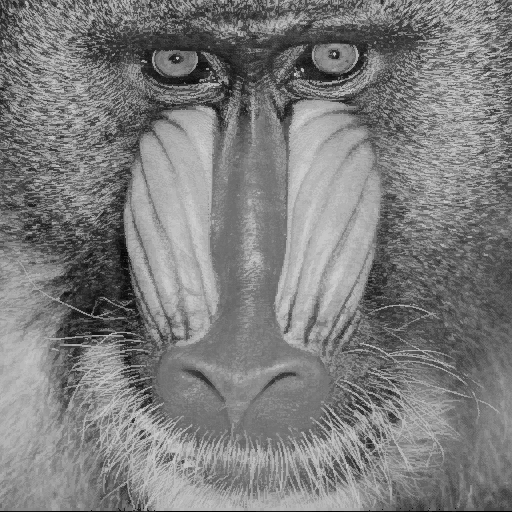

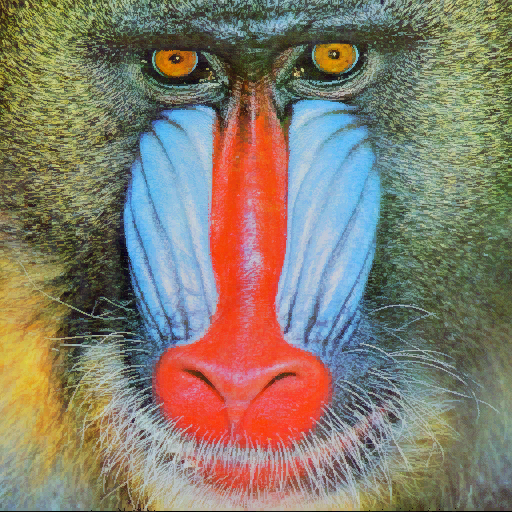

In [64]:
print(type(img_color))

show_image(img_unchanged)
show_image(img_grayscale)
show_image(img_color)

### Resize Image File

 ` new_ref=cv2.resize(org_img_ref,(new_width,new_height)) `

(512, 512, 3)
(150, 150, 3)


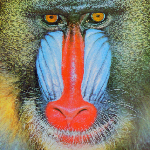

In [65]:
print(img_color.shape)

resized_img = cv.resize(img_color,(150,150))
print(resized_img.shape)
show_image(resized_img)

Write Image file

> cv2.imwrite(filename_as_string, image_ref)

In [66]:
cv.imwrite('img_resized.png',resized_img) 

True


`Color Space` refers to a specific way to organize colors. A color space helps in representing pixel values as tuples. The pixel value 0 is taken as black and 255 is taken as white.  

There are many other color spaces that are useful for different purposes. Few color spaces like RGB, HSV, Gray, GRB, YUV, CMYK etc. are more popular. By default, OpenCV reads images in RGB color space but it stores the colors of images in BGR format not in RGB format

In [67]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )


['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

### Change Color

> gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
> plt.imshow(gray_img)

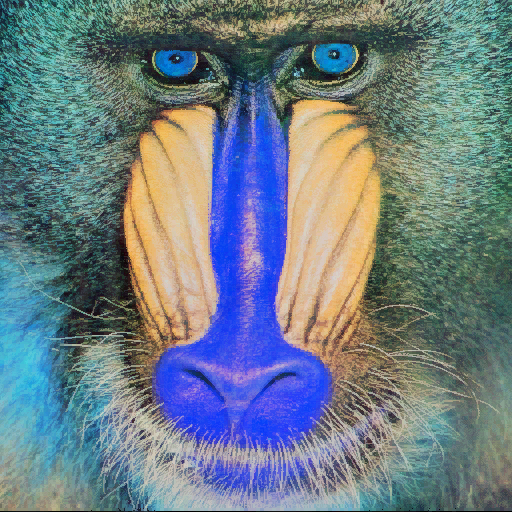

In [68]:
gray_img = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
show_image(gray_img)


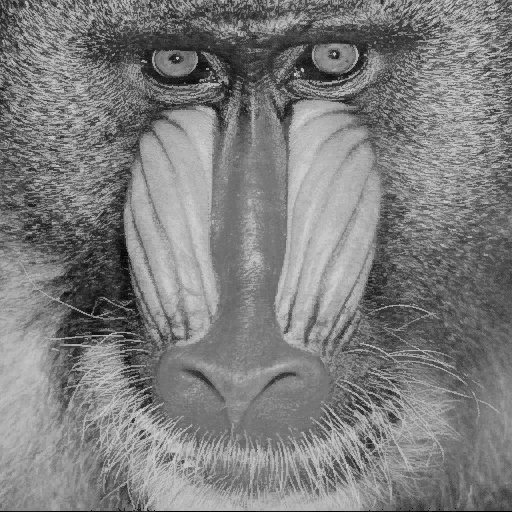

In [69]:
gray_img = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
show_image(gray_img)

### Transformation

`Transformation` is a function. A function that maps one set to another set after performing some operations. 

Common image transformation techniques using OpenCV package.  

* Geometrical Transformations 
* Scaling 
* Translation 
* Rotation 
* Affine Transformation 
* Perspective Transformation
* Morphological Transformations 
  * Erosion 
  * Dilation 
  * Opening 
  * Closing 
  * Morphological Gradient 
  * Top Hat 
  * Black Hat 

#### Scaling

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. By default, interpolation method used is cv2.INTER_LINEAR for all resizing purposes.  

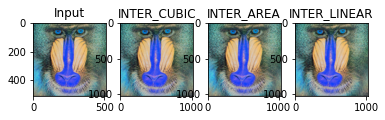

In [70]:
import matplotlib.pyplot as plt

res = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
res1 = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_AREA)
res2 = cv.resize(img_color,None,fx=2, fy=2, interpolation = cv.INTER_LINEAR)
plt.subplot(241),plt.imshow(img_color),plt.title('Input')
plt.subplot(242),plt.imshow(res),plt.title('INTER_CUBIC')
plt.subplot(243),plt.imshow(res1),plt.title('INTER_AREA')
plt.subplot(244),plt.imshow(res2),plt.title('INTER_LINEAR')
plt.show()


#### Translation
Translation is the shifting of object’s location

(512, 512, 3)


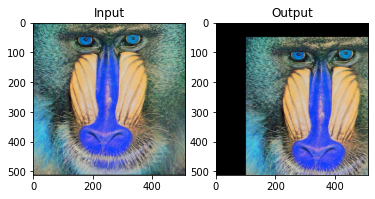

In [71]:
print(img_color.shape)
rows,cols,_ = img_color.shape
M = np.float32([[1,0,100],[0,1,50]])#
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Rotation
Rotation of an image for an angle Θ is achieved by the transformation matrix of the form  

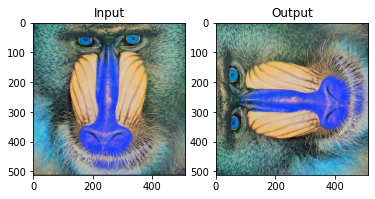

In [72]:
rows,cols,_ = img_color.shape
M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Affine Transformation 

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine

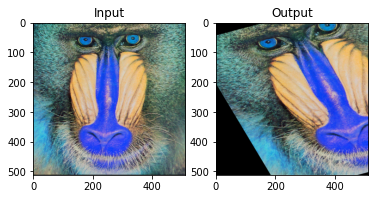

In [73]:
rows,cols,ch = img_color.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img_color,M,(cols,rows))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

#### Perspective Transformation

For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv2.warpPerspective with this 3x3 transformation matrix. 

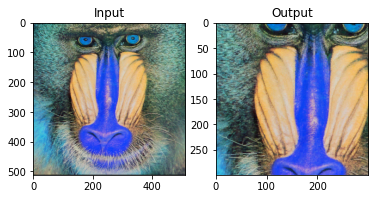

In [74]:

rows,cols,ch = img_color.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_color,M,(300,300))
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


#### Morphological transformations 
Morphological transformations are simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. 

Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.



##### Erosion 

A kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). 

 
All the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises (as we have seen in colorspace chapter), detach two connected objects etc. 

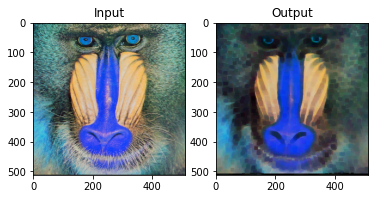

In [75]:
kernel = np.ones((10,10),np.uint8)
erosion = cv.erode(img_color,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(erosion),plt.title('Output')
plt.show()

##### Dilation 

Opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object. 

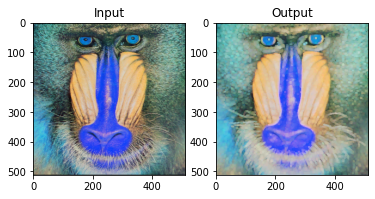

In [76]:
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img_color,kernel,iterations = 1)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(dilation),plt.title('Output')
plt.show()

##### Opening 

Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

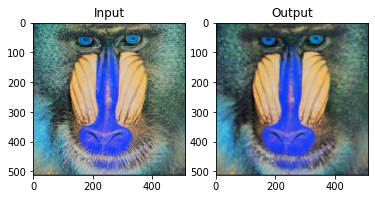

In [77]:

kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img_color, cv.MORPH_OPEN, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(opening),plt.title('Output')
plt.show()


##### Closing 

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. 


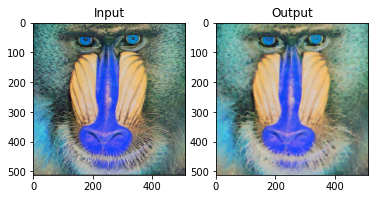

In [78]:
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img_color, cv.MORPH_CLOSE, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(closing),plt.title('Output')
plt.show()

##### Morphological Gradient 
It is the difference between dilation and erosion of an image. 

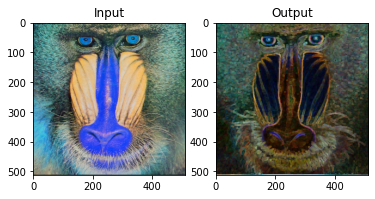

In [79]:

kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img_color, cv.MORPH_GRADIENT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(gradient),plt.title('Output')
plt.show()


##### Top Hat 

It is the difference between input image and Opening of the image.

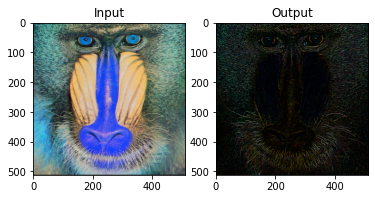

In [80]:
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img_color, cv.MORPH_TOPHAT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(tophat),plt.title('Output')
plt.show()

##### Black Hat 

It is the difference between the closing of the input image and input image. 

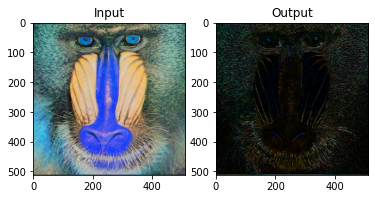

In [81]:

kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(img_color, cv.MORPH_BLACKHAT, kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Input')
plt.subplot(122),plt.imshow(blackhat),plt.title('Output')
plt.show()


## Preprocessing

Preprocessing of image is the first phase of image analysis. The purpose of preprocessing is to improve the quality of an image before processing. 

### Image Thresholding

Thresholding is one of the preprocessing methods. In thresholding, a threshold value is defined. We compare this threshold value with each pixel value of the image and update it accordingly. For example, in simple thresholding, if a pixel value is less than the threshold value, it is made 0 (that is black) and if it is greater than the threshold, it is made 1 (that is white).

Image thresholding helps in creating binary image from a color or gray scale image. Noise reduction is an important task in image processing. Thresholding helps in noise reduction. It also helps in separating light and dark regions of an image.

Many times in image processing tasks, we need to recognize objects. In these cases, the background has not much significance and hence there is a need to subtract background. In some other applications the foreground plays an important role and needs to be extracted from the image. Image thresholding techniques helps in separating the background pixels from foreground pixels in images.  

OpenCV supports multiple thresholding techniques. Some of them are:

1.       Simple

2.       Inverted

3.       Truncated

4.       Adaptive

These techniques work well on greyscale image. So, we need to convert an image to grayscale image before applying these techniques. Let us look at few important thresholding techniques:

#### Simple Thresholding

If pixel value in an image is greater than a threshold value, it is assigned one value (may be white) else it is assigned another value (may be black). Thresholding happens on a gray scale image.

cv2.threshold(). 
* First argument is the source image, which should be a grayscale image. 
* Second argument is the threshold value which is used to classify the pixel values. 
* Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. 
* The fourth argument is the type of thresholding we want to do. For simple or binary thresholding, the 4th argument is cv2.THRESH_BINARY. 

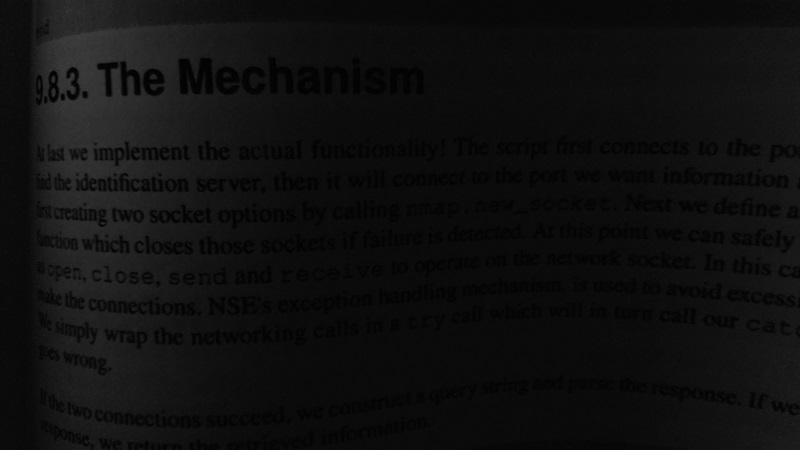

In [82]:
t_image = cv.imread(image_map["bookpage"])
t_image_greyscale = cv.cvtColor(t_image,cv.COLOR_BGR2GRAY)
show_image(t_image_greyscale)

#### Inverted Thresholding

This technique is the inverse of the simple thresholding technique. Here if the pixel value is less than the threshold value, the pixel value will be updated to 255, else it will be updated to 0. 

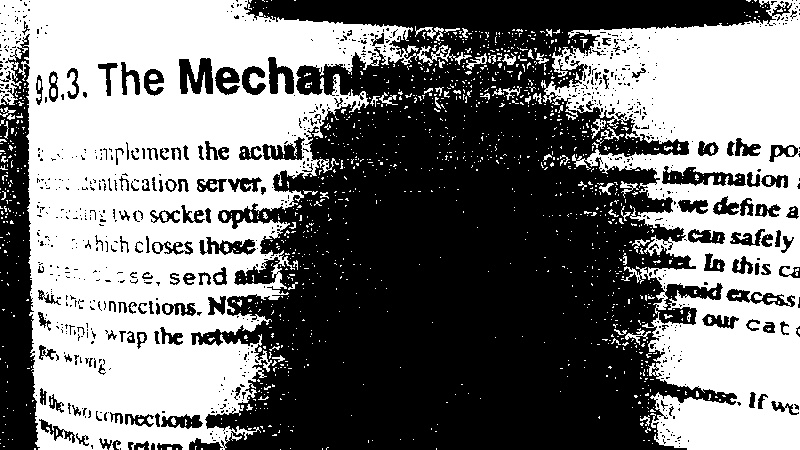

In [83]:
thimage = cv.threshold(t_image_greyscale, 12, 255, cv.THRESH_BINARY)
show_image(thimage)     

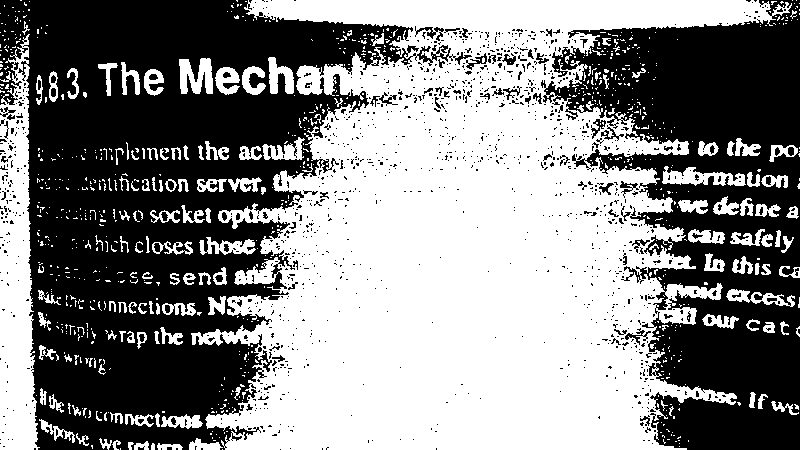

In [84]:
thval, invthimage = cv.threshold(t_image_greyscale, 12, 255, cv.THRESH_BINARY_INV)
show_image(invthimage)

#### Adaptive Thresholding

The image is converted to many regions. For each region, the threshold value is calculated, unlike simple thresholding where the threshold value is global.

In OpenCV, the method `cv2.adaptiveThreshold()` is used to do the adaptive thresholding of an image. 

The syntax is:


> cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

where, 
* source is the input image, 
* maxVal is the value that is assigned to a pixel, 
* adaptiveMethod shows how to calculate the threshold value, 
* blocksize is the pixel neighborhood size, 
* constant is the value that is to be subtracted from the mean.

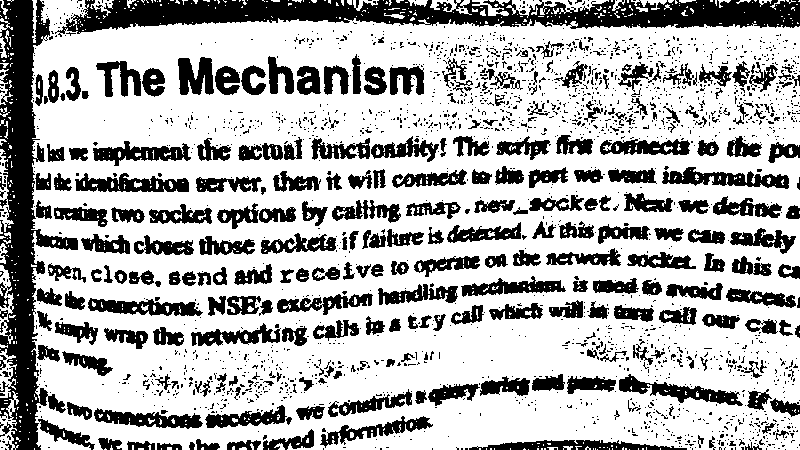

In [85]:
adaptiv_image = cv.adaptiveThreshold(t_image_greyscale, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 115, 1)
show_image(adaptiv_image)

### Image domain

An image domain is the domain in which the arrangement and relationship among different pixel intensities are expressed. There are different domains in which an image can be represented. Few important image domains are,

* Spatial domain : Commonly used one is Spatial domain. Mostly digital images are represented in this domain. Here, images are seen as a collection of pixels and the pixel value change with respect to the scene
* Frequency domain : Image is analyzed with respect to the frequency at which the pixel values occurs or changes
* Time-Frequency domain

#### Smoothing techniques (Spacial Domain)
Smoothing techniques are used to reduce the noise present in an image. Note that, noise in image refers to variation of brightness or color information in images. This is usually an aspect of electronic noise. It can also be produced by the sensor and circuitry of a scanner or digital camera. 

In smoothing, the image is blurred with various low pass filters. A low pass filter averages out rapid changes in intensity in an image. The simplest low-pass filter just calculates the average of a pixel in all of its eight immediate neighbors. The result replaces the original value of the pixel. This process is repeated for every pixel in the image. A smoothing filter helps in removing sharp transitions of pixels.  

In a similar manner, many different low pass filters are defined. In this section, Two types of smoothing or low pass filtering techniques:

1. Spatial Filtering
2. Averaging

###### Spatial Filtering

A filter with some height and width which is much less than the size of the image, is called a spatial filter. Commonly used size of spatial filter is 3 by 3, 5 by 5, or 7 by 7. A filter is also called as a kernel, mask, window or a template. 

The following is an example of a 3 by 3 spatial filter.Filtering is performed in the following way:
* For each pixel, a 3 by 3 window is centered on this pixel, all pixels falling in this window are summed. 
* This value is replaced by the pixel value.
* Similar process is done for each pixel in the image. 
* Finally, we get an image which is not very different from the original image but yes, with smooth pixel values.

We can use the cv2.blur() method of OpenCV to implement this. 

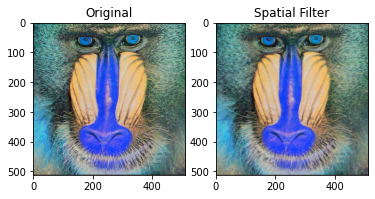

In [86]:
spa_fil = cv.blur(img_color,(3,3))
plt.subplot(121)
plt.imshow(img_color)
plt.title('Original')
plt.subplot(122)
plt.imshow(spa_fil)
plt.title('Spatial Filter')
plt.show()

###### Average Filtering

The blurring is done by convolving the image with a suitable kernel. It simply takes the average of all the pixels under kernel area and replace it with the central element. This is done by the function cv2.blur() or cv2.boxFilter(). We should specify the width and height of kernel.

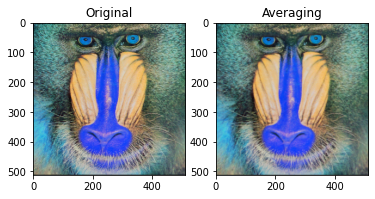

In [87]:
kernel = np.ones((3,3),np.float32)/9
dst = cv.filter2D(img_color,-1,kernel)
plt.subplot(121),plt.imshow(img_color),plt.title('Original')
#plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
#plt.xticks([]), plt.yticks([])
plt.show()

### Contours 
Contours are bounding lines, that enclose pixels of similar intensity concentrated in a region. Contours help in shape analysis, object detection and recognition.

Before finding the contours, it is recommended to convert an image to binary format, for better & accurate results. Thresholding techniques can be applied to achieve the same, or it can be achieved by canny edge detection

In [88]:
contour_impath = image_map["spoon"]
contour_img = cv.imread(contour_impath)
contour_img_resize = cv.resize(contour_img,(400,400))
contour_img_grayscale = cv.cvtColor(contour_img_resize, cv.COLOR_BGR2GRAY)
thresh_val,img_simple_thresh=cv.threshold(contour_img_grayscale,100,255,cv.THRESH_BINARY)

###### findContours
On the binary image, findContours function of cv2 library is used to detect all contours in the image.

> contours_ref, cont_hierarchy_ref = cv2.findContours(ip_binary_img_ref, RetrievalModes, contourApproximationModes)

where

* result_img_ref will be copy of ip_binary_img_ref
* contours_ref => collection of contours detected
* cont_hierarchy_ref => based on the RetrievalMode, how detected contours are related<br>
RetrievalModes => https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

* contourApproximationModes => cv2.CHAIN_APPROX_NONE or cv2.CHAIN_APPROX_SIMPLE
 * cv2.CHAIN_APPROX_NONE – identifies continuous bounding line as contours
 * cv2.CHAIN_APPROX_SIMPLE – identifies prominent points that marks the edges of the contours


In [89]:
img_contours, cont_hierarchy = cv.findContours(img_simple_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cont_hierarchy.shape

(1, 438, 4)

##### DrawContours

To draw the detected contours, drawContours function of cv2 library is used. This method, modifies the image, on which it works.

Syntax:

> cv2.drawContours(img_ref,contours_collection_ref,contour_index,color,thickness,lineTypes)
where

* color => (blue_component, green_component, red_component)
* line_type => cv2.FILLED, cv2.LINE_4, cv2.LINE_8 or cv2.LINE_AA (equivalent to -1, 4, 8 or 16)

Note: if contour_index given as -1, draws all contours.

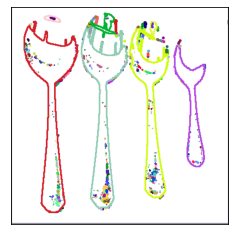

In [90]:
canvas = 255*np.ones((contour_img_grayscale.shape[0], contour_img_grayscale.shape[1], 3), dtype=np.uint8)
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    cv.drawContours(canvas, img_contours, i, color, 2, cv.LINE_8) #specific contour
plt.xticks([]), plt.yticks([])
plt.imshow(canvas)

##### convexHull
In certain cases, instead of a rugged contour, there might be need for smooth bounding line. That is where convex hull fits in. To generate a convex hull, for a contour, the convexHull function of cv2 library is used

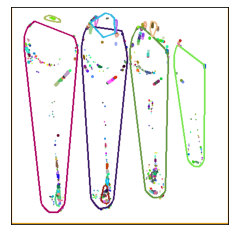

In [91]:
canvas = 255*np.ones((contour_img_grayscale.shape[0], contour_img_grayscale.shape[1], 3), dtype=np.uint8)
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    spoons_hull = [cv.convexHull(img_contours[i])]
    cv.drawContours(canvas, spoons_hull, 0, color,2)
plt.xticks([]), plt.yticks([])
spoons = cv.cvtColor(canvas, cv.COLOR_BGR2RGB)
plt.imshow(spoons)

##### Bounding Rectangles

Draw a rectangle that bounds the contour.

1. Finding the bounding rectangle –

> x,y,wd,ht=cv2.boundingRect(contour_ref)<br>
> where (x,y) will be the left bottom co-ordinates of the bounding rectangle with width wd, and height ht.

2. Drawing the rectangle –

> cv2.rectangle(img_ref,(x,y),(x+wd,y+ht),color)

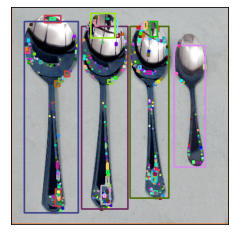

In [92]:
img_contours_rect = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    x,y,w,h = cv.boundingRect(img_contours[i])
    cv.rectangle(img_contours_rect,(x,y),(x+w,y+h),color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_contours_rect)

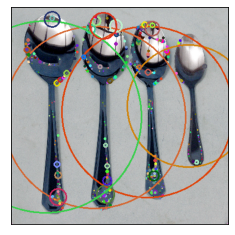

In [93]:
img_cir = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    (x,y),radius = cv.minEnclosingCircle(img_contours[i])
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(img_cir,center,radius,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_cir)

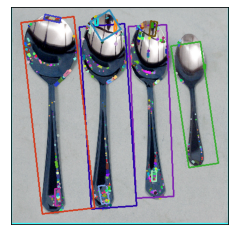

In [94]:
img_rota_rect = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
    rota_rect = cv.minAreaRect(img_contours[i])
    box = cv.boxPoints(rota_rect)
    box = np.intp(box)
    cv.drawContours(img_rota_rect,[box],0,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_rota_rect)

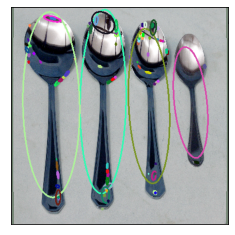

In [95]:
img_ellipse = cv.resize(contour_img, (400,400))
for i in range(len(img_contours)):
    if(img_contours[i].shape[0]>=5):
        color = (np.random.randint(0,256), np.random.randint(0,256), np.random.randint(0,256))
        ellipse = cv.fitEllipse(img_contours[i])
        cv.ellipse(img_ellipse,ellipse,color,2)
plt.xticks([]), plt.yticks([])
plt.imshow(img_ellipse)